In [1]:
import json
import pandas as pd
import chardet
import re
from nltk.corpus import stopwords
import nltk
import networkx as nx
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arg21\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arg21\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# Leer los primeros bytes del archivo para detectar la codificación
with open('tioberny.txt', 'rb') as file:
    raw_data = file.read()

# Detectar la codificación
result = chardet.detect(raw_data)
encoding = result['encoding']

# Lista para almacenar todos los objetos JSON
data_list = []

# Leer el archivo línea por línea
with open('tioberny.txt', 'r', encoding=encoding) as file:
    for line in file:
        try:
            # Intentar convertir cada línea en un objeto JSON
            json_data = json.loads(line)
            data_list.append(json_data)
        except json.JSONDecodeError as e:
            print(f"Error en la línea: {line}, error: {e}")

# Crear un DataFrame con todos los objetos JSON
df = pd.json_normalize(data_list)

# Mostrar el DataFrame
df


id               id_str  \
0     1834281080029110288  1834281080029110288   
1     1834252464092069901  1834252464092069901   
2     1834280919336976681  1834280919336976681   
3     1834280512933732694  1834280512933732694   
4     1834279986254987428  1834279986254987428   
...                   ...                  ...   
5014  1832570119563743682  1832570119563743682   
5015  1832569640079270018  1832569640079270018   
5016  1832569563109896313  1832569563109896313   
5017  1832568528508968963  1832568528508968963   
5018  1832567980749660272  1832567980749660272   

                                                    url  \
0     https://x.com/La_ReVoluZzion/status/1834281080...   
1     https://x.com/XelaNewsGt/status/18342524640920...   
2     https://x.com/M24095273/status/183428091933697...   
3     https://x.com/carlosalbesc/status/183428051293...   
4     https://x.com/Brenda_AGN/status/18342799862549...   
...                                                 ...   
5014  https://x.com/Benjamdc7/status/183257011956374...   
5015  https://x.com/lfarivas/status/1832569640079270018   
5016  https://x.com/MynorAroldopab1/status/183256956...   
5017  https://x.com/extasisvgames/status/18325685285...   
5018  https://x.com/Elemasurf/status/183256798074966...   

                           date lang  \
0     2024-09-12 17:21:03+00:00   es   
1     2024-09-12 15:27:20+00:00   es   
2     2024-09-12 17:20:25+00:00   es   
3     2024-09-12 17:18:48+00:00   es   
4     2024-09-12 17:16:42+00:00   es   
...                         ...  ...   
5014  2024-09-08 00:02:18+00:00   es   
5015  2024-09-08 00:00:24+00:00   es   
5016  2024-09-08 00:00:05+00:00   es   
5017  2024-09-07 23:55:59+00:00   es   
5018  2024-09-07 23:53:48+00:00   es   

                                             rawContent  replyCount  \
0     _\nConfirmado Compañeres,\n\nEl impuesto por l...           0   
1     #URGENTE Lo que los medios #faferos no informa...          12   
2     @IvanDuque @BArevalodeLeon Con que usaste PEGA...           0   
3     @IvanDuque @BArevalodeLeon Entre Ellos se enti...           0   
4     El presidente @BArevalodeLeon y la vicepreside...           0   
...                                                 ...         ...   
5014  @marvgcaceres @diaco_gt @GuatemalaGob @vinicio...           0   
5015  @Soygeorgegt Lastima @BArevalodeLeon la gente ...           0   
5016  Alguien sabe si este precio es culpa de @BArev...           0   
5017  @guate_opina @BArevalodeLeon Y los diputados p...           0   
5018  @ElQueNews @BArevalodeLeon @lucreciapeinado @F...           1   

      retweetCount  likeCount  quoteCount  ...  \
0                0          0           0  ...   
1               80        142          15  ...   
2                0          0           0  ...   
3                0          0           0  ...   
4                0          0           0  ...   
...            ...        ...         ...  ...   
5014             0          0           0  ...   
5015             0          0           0  ...   
5016             0          0           0  ...   
5017             0          1           0  ...   
5018             1         20           0  ...   

      quotedTweet.quotedTweet.inReplyToTweetIdStr  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   
...                                           ...   
5014                                          NaN   
5015                                          NaN   
5016                                          NaN   
5017                                          NaN   
5018                                          NaN   

      quotedTweet.quotedTweet.inReplyToUser quotedTweet.quotedTweet.source  \
0                                       NaN                    

# 3 Preprocesamiento de Datos

In [4]:
stop_words = set(stopwords.words('spanish'))

In [5]:
# Expresiones regulares compiladas para mejorar el rendimiento
mention_pattern = re.compile(r'@\w+')
url_pattern = re.compile(r'http\S+')
punctuation_pattern = re.compile(r'[^\w\s]')
digit_pattern = re.compile(r'\d+')


# Función para limpiar el texto de un tweet
def clean_text(text):
    text = text.lower()  # Convertir a minúsculas
    text = mention_pattern.sub('', text)  # Eliminar menciones (@usuario)
    text = url_pattern.sub('', text)  # Eliminar URLs
    text = punctuation_pattern.sub('', text)  # Eliminar puntuación
    text = digit_pattern.sub('', text)  # Eliminar números
    
    # Filtrar palabras que no estén en la lista de stop_words
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Función para verificar si una línea es un JSON válido
def validar_json(line):
    try:
        json.loads(line)
        return True
    except json.JSONDecodeError:
        return False

def normalizacion_usuario(username):
    return username.lower().replace('@', '').strip()

def metadata(tweet):
    mentions = [normalizacion_usuario(mention['username']) for mention in tweet.get('mentionedUsers', [])]
    
    in_reply_to = tweet.get('inReplyToUser', {})
    in_reply_to_username = in_reply_to.get('username', None) if in_reply_to else None
    
    retweeted_tweet = tweet.get('retweetedTweet', {})
    retweeted_user = retweeted_tweet.get('user', {}).get('username', None) if retweeted_tweet else None
    
    return mentions, normalizacion_usuario(in_reply_to_username) if in_reply_to_username else None, normalize_username(retweeted_user) if retweeted_user else None


# Función para cargar y limpiar el archivo de tweets
def clean_file(file_path):
    tweets_data = []
    with open(file_path, 'r', encoding='utf-16') as file:
        for line_number, line in enumerate(file, 1):
            try:
                tweet = json.loads(line) 
                raw_content = tweet.get('rawContent', '') 
                mentions, in_reply_to, retweeted_user = metadata(tweet)
                if raw_content:
                    cleaned_text = clean_text(raw_content)  
                    tweets_data.append({
                        'rawContent': raw_content,
                        'cleaned_text': cleaned_text,
                        'mentions': mentions,
                        'in_reply_to': in_reply_to,
                        'retweeted_user': retweeted_user
                    })
            except json.JSONDecodeError as e:
                print(f"Error decodificando JSON en la línea {line_number}: {e}")
    return pd.DataFrame(tweets_data)

tioberny_df = clean_file('tioberny.txt')

print("\nEjemplos de tweets limpiados de tioberny:")
print(tioberny_df.head())



Ejemplos de tweets limpiados de tioberny:
                                          rawContent  \
0  _\nConfirmado Compañeres,\n\nEl impuesto por l...   
1  #URGENTE Lo que los medios #faferos no informa...   
2  @IvanDuque @BArevalodeLeon Con que usaste PEGA...   
3  @IvanDuque @BArevalodeLeon Entre Ellos se enti...   
4  El presidente @BArevalodeLeon y la vicepreside...   

                                        cleaned_text  \
0  _ confirmado compañeres impuesto solo cuenta p...   
1  urgente medios faferos informaron ayer acerca ...   
2  usaste pegasus espiar detractores obra narcisi...   
3         entienden bien cuadrando productivareunión   
4  presidente vicepresidenta participan sesión so...   

                                            mentions in_reply_to  \
0  [usembassyguate, 48cantonestoto, usaidguate, u...        None   
1                                                 []        None   
2                        [ivanduque, barevalodeleon]   ivanduque   
3          

#### Eliminar duplicados

# 4 Analisis Explotartorio

#### Número de tweets, usuarios únicos, menciones

In [6]:
total_tweets = len(df)
unique_users = df['user.id'].nunique()

print(f"Total de tweets: {total_tweets}")
print(f"Usuarios únicos: {unique_users}")


Total de tweets: 5019
Usuarios únicos: 2620


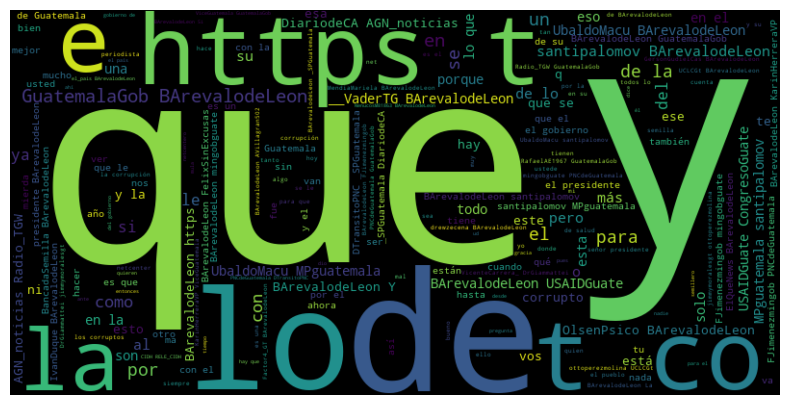

In [7]:


text = ' '.join(df['rawContent'])
wordcloud = WordCloud(width=800, height=400).generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# 5 Análisis de la Topología de la Red

C:\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127474 (\N{REGIONAL INDICATOR SYMBOL LETTER M}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127485 (\N{REGIONAL INDICATOR SYMBOL LETTER X}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128105 (\N{WOMAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:

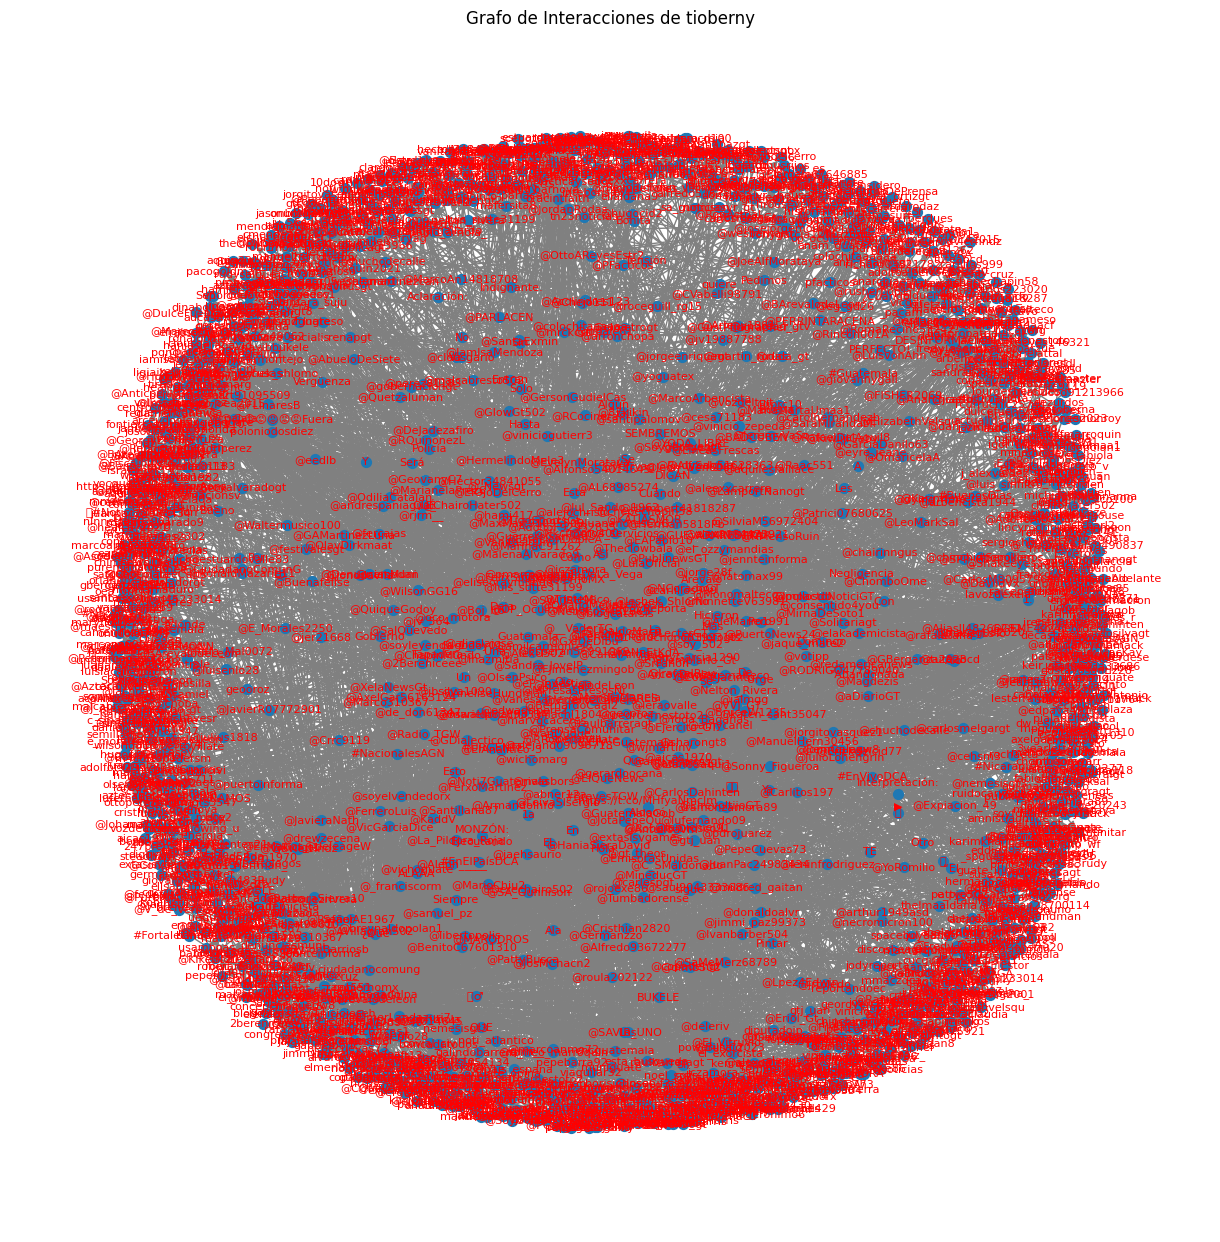

Densidad de la red: 0.0012128182625901437
La red no es conexa, no se puede calcular el diámetro.
Coeficiente de agrupamiento promedio: 0.0


In [8]:
# Importar las métricas necesarias
from networkx import density, diameter, clustering, is_connected

# Función para construir el grafo a partir de los DataFrames procesados
def grafo_interacciones(df):
    G = nx.DiGraph()  # Crear un grafo dirigido
    
    for _, row in df.iterrows():
        user = row['rawContent'].split(' ')[0] 
        
        # Añadir aristas para menciones
        for mention in row['mentions']:
            if mention and user:
                G.add_edge(user, mention, interaction='mention')
        
        # Añadir aristas para respuestas
        if row['in_reply_to']:
            G.add_edge(user, row['in_reply_to'], interaction='reply')
        
        # Añadir aristas para retweets
        if row['retweeted_user']:
            G.add_edge(user, row['retweeted_user'], interaction='retweet')
    
    return G

# Construir el grafo
tioberny = grafo_interacciones(tioberny_df)

# Visualizar el grafo de tioberny
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(tioberny, k=0.5, iterations=50)
nx.draw(tioberny, pos, with_labels=True, node_size=50, font_size=8, font_color='red', edge_color='gray')
plt.title("Grafo de Interacciones de tioberny")
plt.show()

# 5.2 Cálculo de métricas clave

# Densidad de la red
network_density = density(tioberny)
print(f"Densidad de la red: {network_density}")

# Diámetro de la red
# El diámetro solo puede calcularse en grafos conexos, primero verificamos si la red es conexa
if nx.is_connected(tioberny.to_undirected()):
    network_diameter = diameter(tioberny)
    print(f"Diámetro de la red: {network_diameter}")
else:
    print("La red no es conexa, no se puede calcular el diámetro.")

# Coeficiente de agrupamiento
clustering_coefficients = clustering(tioberny)
avg_clustering_coefficient = sum(clustering_coefficients.values()) / len(clustering_coefficients)
print(f"Coeficiente de agrupamiento promedio: {avg_clustering_coefficient}")


# 6. Identificación y análisis de comunidades

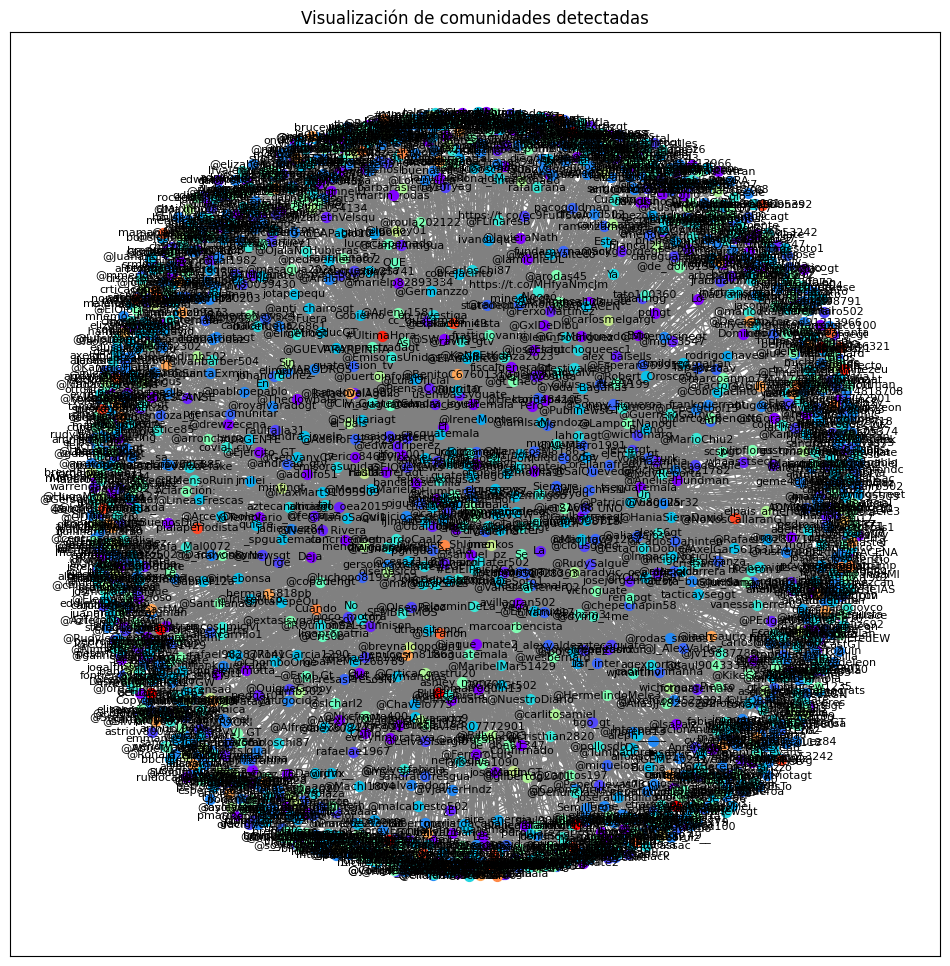

In [9]:
import community as community_louvain
import numpy as np

# Convertir el grafo dirigido a uno no dirigido
tioberny_undirected = tioberny.to_undirected()

# Aplicar el algoritmo de Louvain para detectar comunidades en el grafo no dirigido
partition = community_louvain.best_partition(tioberny_undirected)

# Añadir la comunidad detectada como atributo de los nodos en el grafo
nx.set_node_attributes(tioberny, partition, 'community')

# Visualizar la partición o comunidades detectadas
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(tioberny_undirected, k=0.5)

# Colores únicos para cada comunidad
communities = set(partition.values())
colors = plt.cm.rainbow(np.linspace(0, 1, len(communities)))

for community, color in zip(communities, colors):
    nodes_in_community = [node for node in partition if partition[node] == community]
    nx.draw_networkx_nodes(tioberny_undirected, pos, nodelist=nodes_in_community, node_size=50, node_color=[color])

nx.draw_networkx_edges(tioberny_undirected, pos, edge_color='gray')
nx.draw_networkx_labels(tioberny_undirected, pos, font_size=8, font_color='black')
plt.title("Visualización de comunidades detectadas")
plt.show()


In [10]:
from collections import Counter

# Contar el número de nodos en cada comunidad
community_sizes = Counter(partition.values())
top_communities = community_sizes.most_common(3)

for i, (community, size) in enumerate(top_communities, 1):
    print(f"Comunidad {i}: {size} nodos")

Comunidad 1: 379 nodos
Comunidad 2: 199 nodos
Comunidad 3: 194 nodos


# 7. Análisis de influencers y nodos clave

In [11]:
# Centralidad de grado
degree_centrality = nx.degree_centrality(tioberny)

# Centralidad de intermediación
betweenness_centrality = nx.betweenness_centrality(tioberny)

# Centralidad de cercanía
closeness_centrality = nx.closeness_centrality(tioberny)

# Mostrar los 5 nodos más influyentes por cada métrica
print("Top 5 por Centralidad de Grado:")
print(sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5])

print("\nTop 5 por Centralidad de Intermediación:")
print(sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])

print("\nTop 5 por Centralidad de Cercanía:")
print(sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])


Top 5 por Centralidad de Grado:
[('barevalodeleon', 0.44281984334203656), ('guatemalagob', 0.08302872062663186), ('mpguatemala', 0.059007832898172324), ('santipalomov', 0.05378590078328981), ('bancadasemilla', 0.05065274151436031)]

Top 5 por Centralidad de Intermediación:
[('_\nConfirmado', 0.0), ('usembassyguate', 0.0), ('48cantonestoto', 0.0), ('usaidguate', 0.0), ('ueguatemala', 0.0)]

Top 5 por Centralidad de Cercanía:
[('barevalodeleon', 0.44281984334203656), ('guatemalagob', 0.08302872062663186), ('mpguatemala', 0.059007832898172324), ('santipalomov', 0.05378590078328982), ('bancadasemilla', 0.05065274151436031)]


# 8. Detección y análisis de grupos aislados

In [12]:
# Encontrar componentes conectados en la versión no dirigida del grafo
subredes_aisladas = list(nx.connected_components(tioberny.to_undirected()))

# Mostrar las subredes más pequeñas
print(f"Subredes aisladas: {len(subredes_aisladas)}")
for subred in subredes_aisladas[:5]:
    print(f"Subred con {len(subred)} nodos: {subred}")


Subredes aisladas: 5
Subred con 1908 nodos: {'@KikeGt2023', 'fjimenezmingob', '@Patrici07680625', '@Ejercito_GT', '@extasisvgames', '@lachoalfaro', 'de_don61347', 'Y', 'Mire', 'mynor007', 'elchuchoqueesc1', 'kile1992', '@mys_servicios', '@LamportNanogt', '@DecastroZoe', 'buenafeilse', 'elbencho_gt', 'mae_rusia', 'Cadena', 'fontierrasguate', 'pressfreedom', '@DaviidVx', 'licopatron', '@abner12a', 'marcoanmo72', 'carlosventurapl', 'roceguill_rg15', 'Es', 'un_spexperts', 'barevalodeleon', 'arodas45', 'vox_es', 'duolingo', 'adolfoalbertoc2', 'Dejen', 'tal', '@masagua2020', 'impactonoticigt', 'nicolasmaduro', 'dictalord502_', 'Este', 'embeselsalvador', 'Check', '"Matamoros,', 'historia_ca', '@VanessaHerrer02', '@jaque_mate2', 'vjavierhndz', 'camagroguate', 'Los', 'yoromilio', '@carlosmcd100', 'samuel_pz', '@JonnGalaxy', '@blogcatarsis', 'Arévalo', 'robrimola', '@PARLACEN', 'brucewayne_maga', '@elrosaenverdese', '13', 'guilmargallardo', 'roula202122', '@Noti_Atlantico', '@ladyjustice85', 'va

# 9. Análisis de contenido y sentimiento

In [13]:
from textblob import TextBlob

# Añadir análisis de sentimiento a cada tweet
def obtener_sentimiento(texto):
    analysis = TextBlob(texto)
    return analysis.sentiment.polarity

# Aplicar a los tweets
tioberny_df['sentimiento'] = tioberny_df['cleaned_text'].apply(obtener_sentimiento)

# Mostrar algunos ejemplos
print(tioberny_df[['rawContent', 'sentimiento']].head())


                                          rawContent  sentimiento
0  _\nConfirmado Compañeres,\n\nEl impuesto por l...          0.0
1  #URGENTE Lo que los medios #faferos no informa...          0.0
2  @IvanDuque @BArevalodeLeon Con que usaste PEGA...          0.0
3  @IvanDuque @BArevalodeLeon Entre Ellos se enti...          0.0
4  El presidente @BArevalodeLeon y la vicepreside...          0.0


In [18]:
import nltk
from gensim import corpora
from gensim.models import LdaModel
nltk.download('punkt', force=True)

import spacy
nlp = spacy.load('en_core_web_sm')

# Tokenizar usando Spacy
tokenized_texts = [[token.text for token in nlp(tweet)] for tweet in tioberny_df['cleaned_text']]

dictionary = corpora.Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

# Entrenar el modelo LDA
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Mostrar los temas más importantes
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arg21\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


(0, '0.012*"vos" + 0.010*"presidente" + 0.008*"arévalo" + 0.007*"si" + 0.007*"mierda"')
(1, '0.015*"si" + 0.013*"solo" + 0.008*"gobierno" + 0.008*"presidente" + 0.006*"guatemala"')
(2, '0.008*"gobierno" + 0.005*"jajaja" + 0.005*"si" + 0.004*"verdad" + 0.004*"presupuesto"')
(3, '0.009*"gobierno" + 0.008*"presidente" + 0.008*"q" + 0.007*"corruptos" + 0.005*"hacer"')
(4, '0.006*"q" + 0.006*"si" + 0.005*"guatemala" + 0.005*"mp" + 0.005*"ser"')
